In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from collections import Counter

In [115]:
df_ds3 = pd.read_csv("../MSDS_Capstone/df_stud_assess_piv_mer3.csv")

In [116]:
df_ds3.columns

Index(['id_student', 'code_course', 'CMA', 'Exam', 'TMA', 'code_module',
       'code_presentation', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'final_result', 'id_assessment', 'assessment_type',
       'date', 'weight', 'weighted_grade', 'code_module.1',
       'code_presentation.1', 'dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object')

In [117]:
df_ds3 = df_ds3.drop(["code_module.1","code_presentation.1"],axis=1)

In [118]:
df_ds3["imd_band"] = df_ds3["imd_band"].replace("10-20","10-20%")

<Axes: >

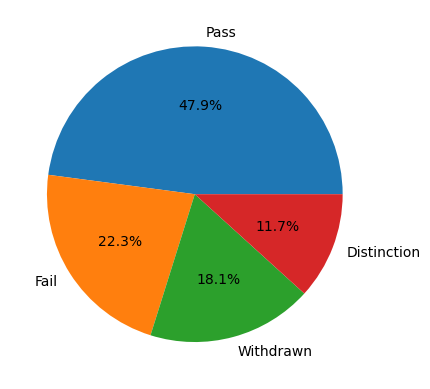

In [119]:
df_ds3["final_result"].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%',ylabel = '')

In [120]:
df_ds3["imd_band"].value_counts()

imd_band
30-40%     2775
20-30%     2741
10-20%     2604
40-50%     2549
50-60%     2541
0-10%      2423
60-70%     2384
70-80%     2379
80-90%     2264
90-100%    2136
?           997
Name: count, dtype: int64

<Axes: ylabel='count'>

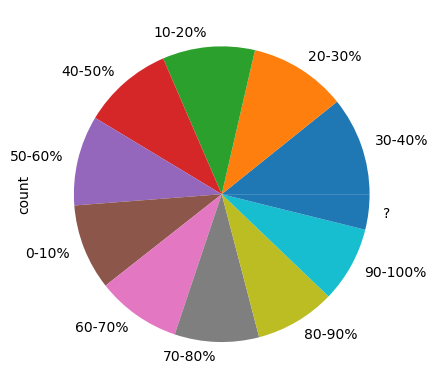

In [121]:
df_ds3["imd_band"].value_counts(dropna=False).plot(kind="pie")

In [122]:
df_ds3_drpqm = df_ds3[df_ds3.imd_band != "?"]

In [123]:
df_ds3_drpqm["imd_band"].value_counts()

imd_band
30-40%     2775
20-30%     2741
10-20%     2604
40-50%     2549
50-60%     2541
0-10%      2423
60-70%     2384
70-80%     2379
80-90%     2264
90-100%    2136
Name: count, dtype: int64

In [124]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [125]:
cols = df_ds3_drpqm.columns.tolist()

<Axes: >

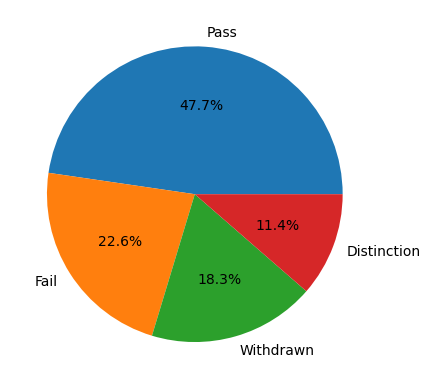

In [126]:
df_ds3_drpqm["final_result"].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%',ylabel = '')

In [127]:
cols

['id_student',
 'code_course',
 'CMA',
 'Exam',
 'TMA',
 'code_module',
 'code_presentation',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'final_result',
 'id_assessment',
 'assessment_type',
 'date',
 'weight',
 'weighted_grade',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

In [128]:
df_ds3_drpqm_le = df_ds3_drpqm.copy()

In [129]:
df_ds3_drpqm_le

,id_student,code_course,CMA,Exam,TMA,code_module,code_presentation,gender,region,highest_education,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA2014J,0,0,309,AAA,2014J,M,Scotland,HE Qualification,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,24734,AAA2014J,0,0,234,AAA,2014J,F,South Region,Lower Than A Level,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,27.0,9.0
2,26192,AAA2014J,0,0,431,AAA,2014J,F,East Anglian Region,A Level or Equivalent,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,250.0,162.0
3,28061,AAA2014J,0,0,388,AAA,2014J,M,Yorkshire Region,Lower Than A Level,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,170.0,110.0
4,31600,AAA2014J,0,0,274,AAA,2014J,F,South West Region,A Level or Equivalent,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,27.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,2654928,EEE2014J,0,0,338,EEE,2014J,M,South Region,Lower Than A Level,...,0.0,399.0,0.0,0.0,80.0,0.0,48.0,0.0,32.0,69.0
25789,2663195,EEE2014J,0,0,339,EEE,2014J,M,East Anglian Region,Lower Than A Level,...,0.0,192.0,0.0,0.0,173.0,0.0,16.0,0.0,23.0,36.0
25790,2681277,EEE2014J,0,0,95,EEE,2014J,M,London Region,HE Qualification,...,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,5.0,8.0
25791,2686053,EEE2014J,0,0,348,EEE,2014J,M,South West Region,A Level or Equivalent,...,0.0,324.0,0.0,0.0,152.0,0.0,14.0,0.0,23.0,61.0


In [130]:
for col in cols:
    if df_ds3_drpqm_le[col].dtype == "object":
        df_ds3_drpqm_le[col]= label_encoder.fit_transform(df_ds3_drpqm_le[col])
    else:
        continue

In [131]:
df_ds3_drpqm_le

,id_student,code_course,CMA,Exam,TMA,code_module,code_presentation,gender,region,highest_education,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,1,0,0,309,0,3,1,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,24734,1,0,0,234,0,3,0,8,2,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,27.0,9.0
2,26192,1,0,0,431,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,250.0,162.0
3,28061,1,0,0,388,0,3,1,12,2,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,170.0,110.0
4,31600,1,0,0,274,0,3,0,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,27.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,2654928,14,0,0,338,4,3,1,8,2,...,0.0,399.0,0.0,0.0,80.0,0.0,48.0,0.0,32.0,69.0
25789,2663195,14,0,0,339,4,3,1,0,2,...,0.0,192.0,0.0,0.0,173.0,0.0,16.0,0.0,23.0,36.0
25790,2681277,14,0,0,95,4,3,1,3,1,...,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,5.0,8.0
25791,2686053,14,0,0,348,4,3,1,9,0,...,0.0,324.0,0.0,0.0,152.0,0.0,14.0,0.0,23.0,61.0


In [132]:
df_ds3_drpqm_le.corr()

,id_student,code_course,CMA,Exam,TMA,code_module,code_presentation,gender,region,highest_education,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
id_student,1.000000,-0.020412,-0.013122,0.021767,0.023526,-0.025825,0.029081,0.002593,-0.007124,0.010555,...,0.002134,0.021824,-0.004304,0.015250,0.004218,-0.002787,0.021472,-0.008087,0.047406,0.041580
code_course,-0.020412,1.000000,0.247100,-0.147127,-0.072258,0.984507,0.127419,0.270757,-0.031542,0.058175,...,0.054848,0.128405,0.334555,0.275227,0.211635,0.011042,-0.029769,-0.076676,0.217833,0.005684
CMA,-0.013122,0.247100,1.000000,-0.080538,0.378600,0.277976,-0.254779,-0.049136,-0.013913,-0.015768,...,0.193148,-0.137502,0.372788,0.370511,0.456900,0.010838,0.091711,0.042265,0.344918,0.122321
Exam,0.021767,-0.147127,-0.080538,1.000000,0.265195,-0.134044,0.103838,0.106729,-0.007703,-0.091892,...,0.023646,0.062664,-0.097549,-0.148844,0.124053,-0.004781,0.255207,-0.027378,0.250908,0.114693
TMA,0.023526,-0.072258,0.378600,0.265195,1.000000,-0.071254,-0.120208,-0.033558,0.008504,-0.117816,...,0.113833,0.219138,0.153855,0.237718,0.140187,0.004462,0.169184,0.031542,0.392080,0.326333
code_module,-0.025825,0.984507,0.277976,-0.134044,-0.071254,1.000000,-0.033726,0.283530,-0.032338,0.057654,...,0.105175,0.153512,0.357555,0.267459,0.208593,0.011217,-0.026879,-0.072976,0.240027,0.034030
code_presentation,0.029081,0.127419,-0.254779,0.103838,-0.120208,-0.033726,1.000000,0.058444,0.000117,-0.017210,...,-0.293899,-0.056844,-0.178527,-0.037969,0.073353,-0.003269,0.020569,-0.047222,-0.138313,-0.158082
gender,0.002593,0.270757,-0.049136,0.106729,-0.033558,0.283530,0.058444,1.000000,0.001714,-0.021757,...,0.042338,0.162129,0.193316,0.105562,0.171816,0.009737,0.008453,-0.050076,0.150782,0.073961
region,-0.007124,-0.031542,-0.013913,-0.007703,0.008504,-0.032338,0.000117,0.001714,1.000000,-0.009271,...,-0.007993,0.001626,-0.009158,-0.003476,-0.018930,-0.005618,-0.014761,-0.011558,-0.017712,-0.004420
highest_education,0.010555,0.058175,-0.015768,-0.091892,-0.117816,0.057654,-0.017210,-0.021757,-0.009271,1.000000,...,0.009473,-0.014389,0.012624,0.000540,-0.020965,0.006493,-0.021850,0.003636,-0.021736,-0.006835


<Axes: >

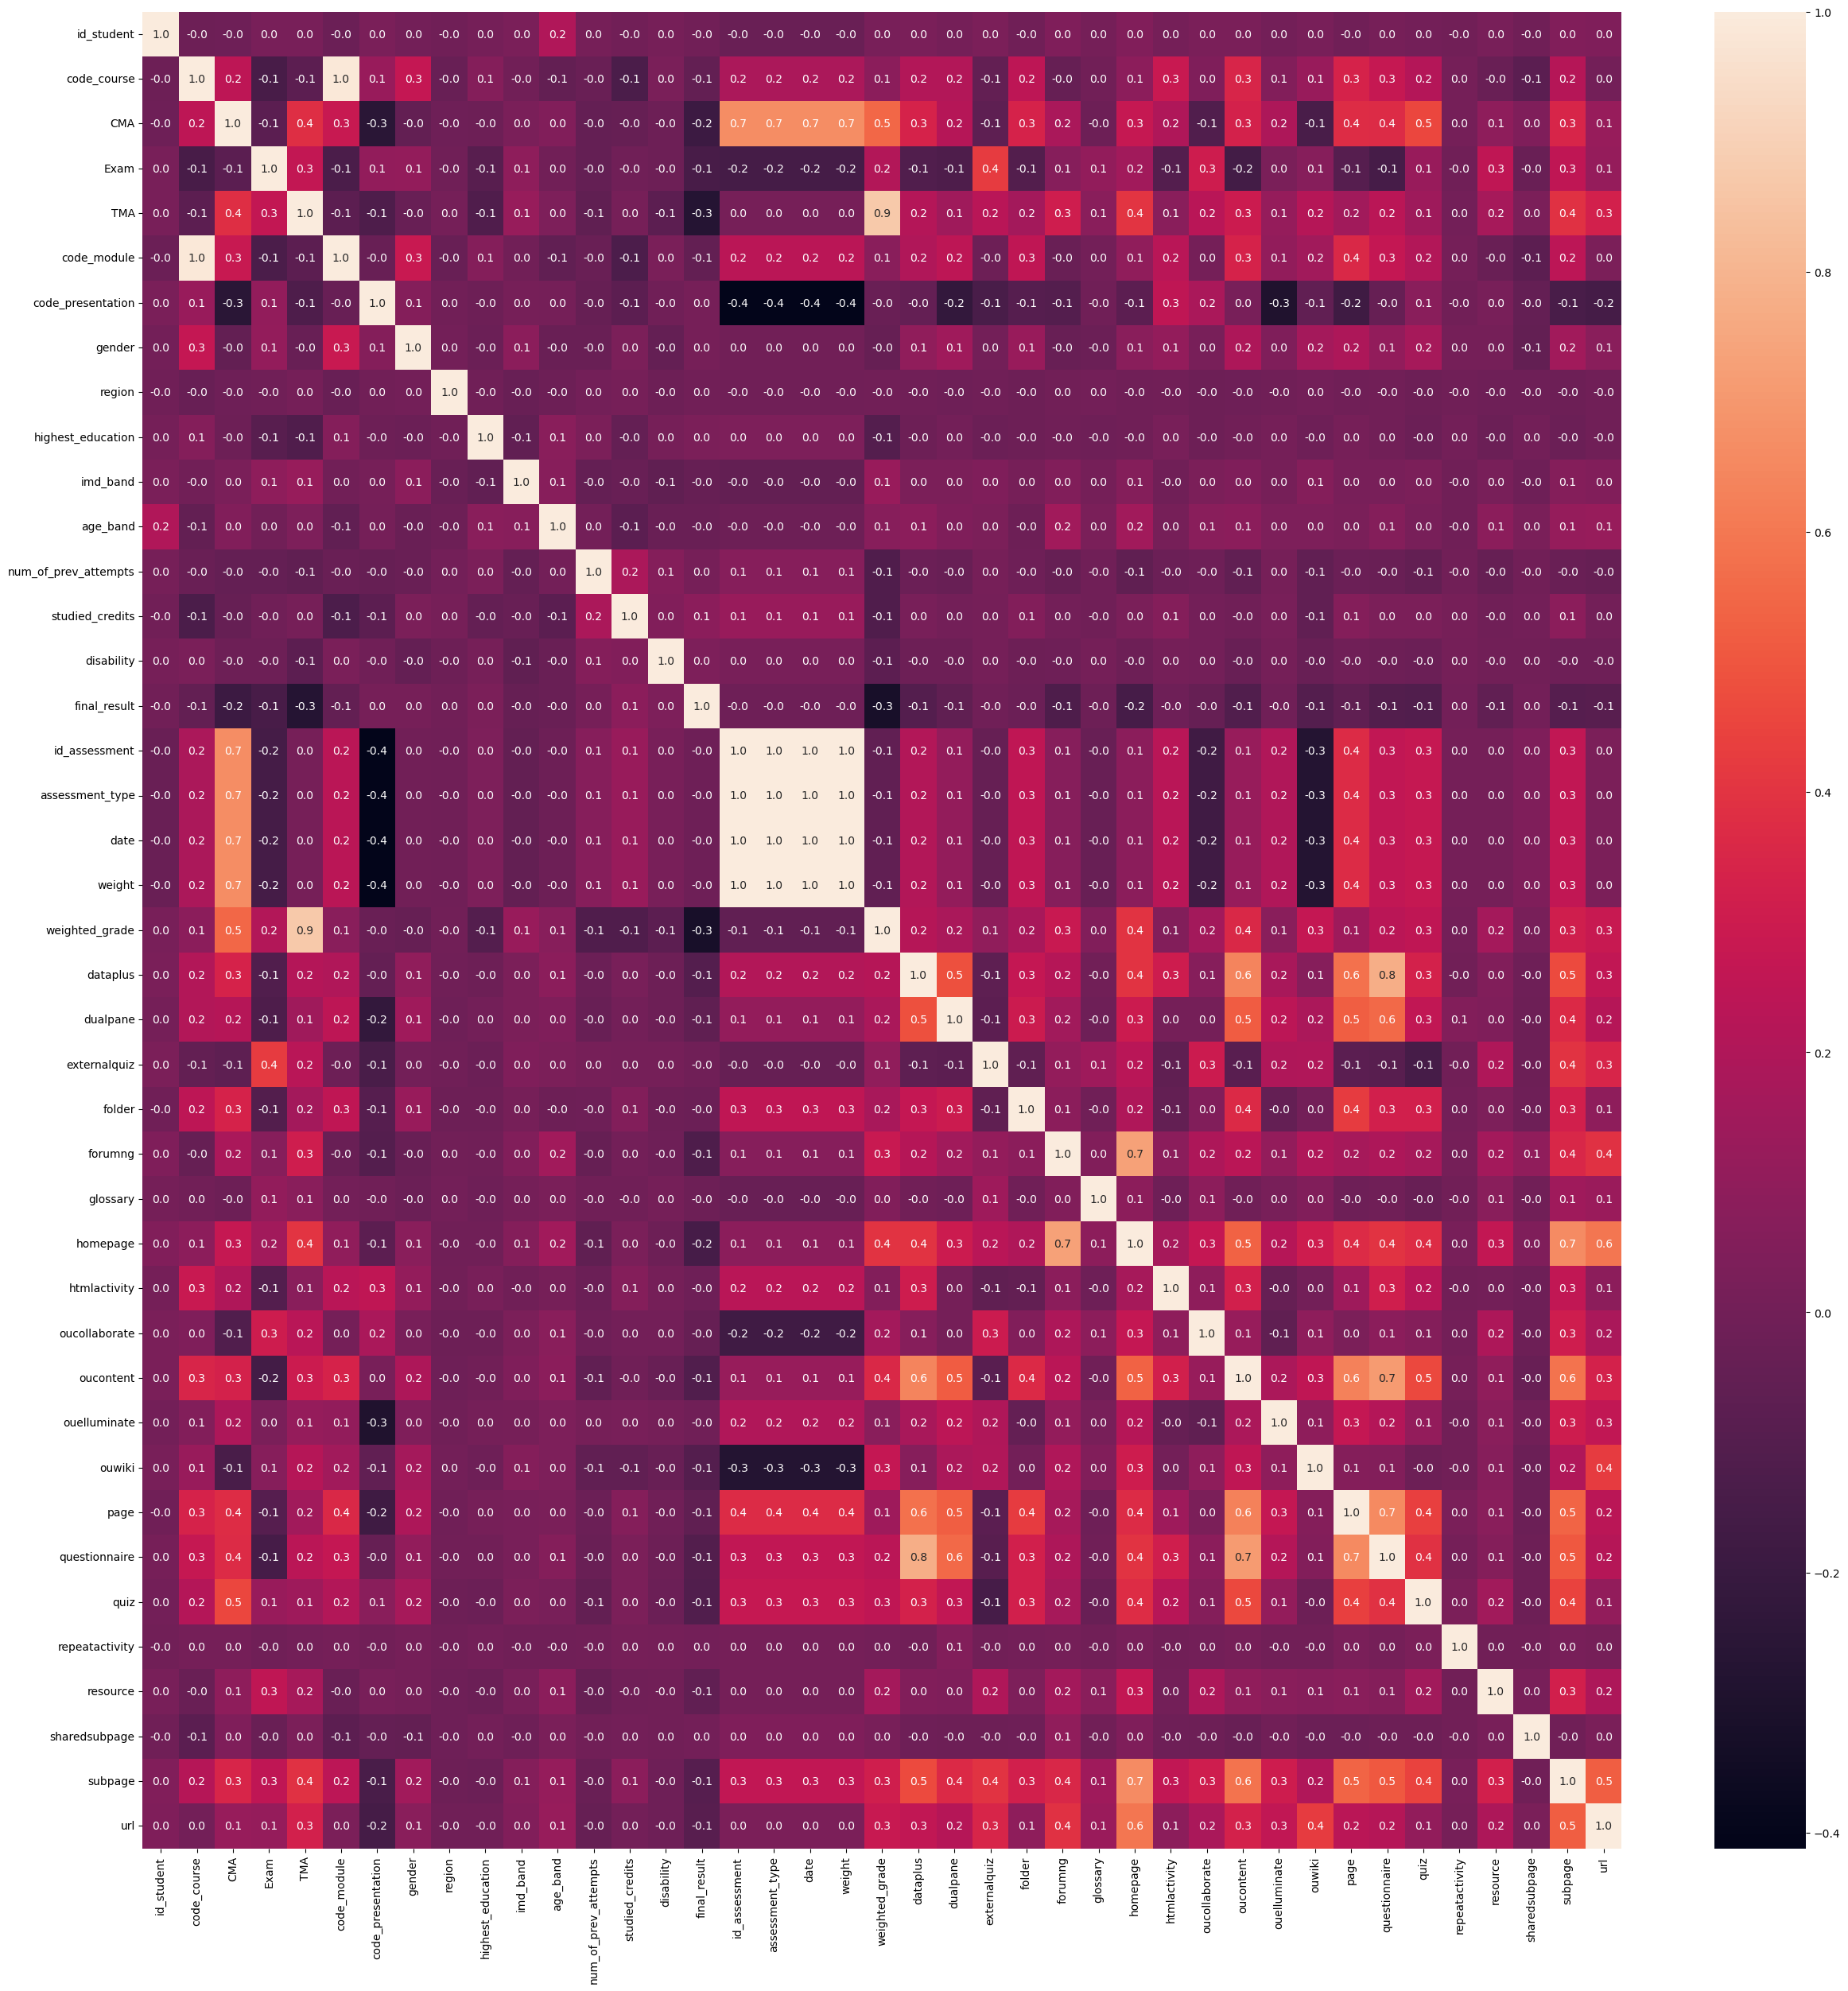

In [133]:
fig, ax = plt.subplots(figsize=(30,30))
mask = np.triu(np.ones_like(df_ds3_drpqm_le.corr()))
sns.heatmap(df_ds3_drpqm_le.corr(), annot = True,fmt=".1f")

<Axes: xlabel='final_result', ylabel='weighted_grade'>

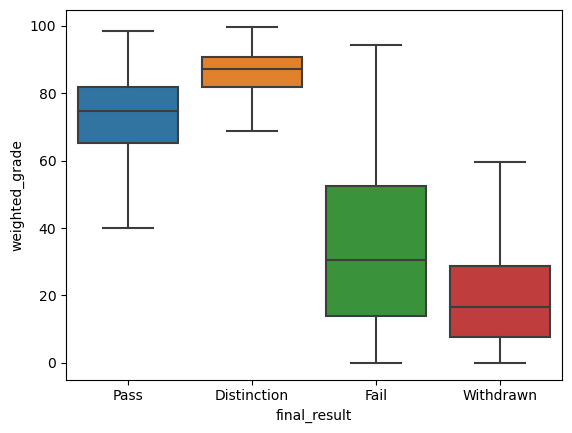

In [134]:
sns.boxplot(x = 'final_result', y = 'weighted_grade', data = df_ds3_drpqm,showfliers=False)

In [135]:
df_ds3_drpqm_mod = df_ds3_drpqm.copy()

In [136]:
df_ds3_drpqm_mod = df_ds3_drpqm_mod.drop(["id_student","code_module","code_presentation"],axis=1)

In [137]:
df_ds3_drpqm_mod = pd.get_dummies(df_ds3_drpqm_mod, columns = ["gender","region","code_course"],dtype=int)

In [138]:
df_ds3_drpqm_mod["age_band"] = df_ds3_drpqm_mod["age_band"].replace({"55<=":2,"35-55":1,"0-35":0})

In [139]:
df_ds3_drpqm_mod["disability"] = df_ds3_drpqm_mod["disability"].replace({"N":0,"Y":1})

In [140]:
df_ds3_drpqm_mod["highest_education"] = df_ds3_drpqm_mod["highest_education"].replace({"No Formal quals":0,"Lower Than A Level":1,"A Level or Equivalent":2,"HE Qualification":3,"Post Graduate Qualification":4})

In [141]:
df_ds3_drpqm_mod["final_result"] = df_ds3_drpqm_mod["final_result"].replace({"Pass":1,"Fail":0,"Withdrawn":3,"Distinction":2})

In [142]:
df_ds3_drpqm_mod["imd_band"] = df_ds3_drpqm_mod["imd_band"].replace({"0-10%":0,"10-20%":1,"20-30%":2,"30-40%":3,"40-50%":4,"50-60%":5,"60-70%":6,"70-80%":7,"80-90%":8,"90-100%":9})

In [143]:
df_ds3_drpqm_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24796 entries, 0 to 25792
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CMA                          24796 non-null  int64  
 1   Exam                         24796 non-null  int64  
 2   TMA                          24796 non-null  int64  
 3   highest_education            24796 non-null  int64  
 4   imd_band                     24796 non-null  int64  
 5   age_band                     24796 non-null  int64  
 6   num_of_prev_attempts         24796 non-null  int64  
 7   studied_credits              24796 non-null  int64  
 8   disability                   24796 non-null  int64  
 9   final_result                 24796 non-null  int64  
 10  id_assessment                24796 non-null  int64  
 11  assessment_type              24796 non-null  int64  
 12  date                         24796 non-null  int64  
 13  weight               

In [144]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [145]:
X = df_ds3_drpqm_mod.drop("final_result",axis=1)
y = df_ds3_drpqm_mod["final_result"]

In [146]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2, random_state=21)

In [147]:
from sklearn import neighbors

In [148]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [149]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [150]:
knn.score(X_test,y_test)

0.6387096774193548

In [151]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

In [152]:
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

Optimal KNN value is  21 0.6633064516129032


In [153]:
from sklearn import tree

In [154]:
dec_tree = tree.DecisionTreeClassifier(random_state=0,max_depth = 100)

In [155]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100, random_state=0)

In [156]:
dec_tree.score(X_test,y_test)

0.6576612903225807

In [157]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_train,y_train)
    dec_tree_score.append(dec_treel.score(X_test,y_test))

In [158]:
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

Optimal DT value is  9 0.7149193548387097


In [159]:
from sklearn import naive_bayes

In [160]:
nb = naive_bayes.MultinomialNB()

In [161]:
nb.fit(X_train,y_train)

MultinomialNB()

In [162]:
nb.score(X_test,y_test)

0.4038306451612903

In [163]:
from sklearn import ensemble

In [164]:
rf = ensemble.RandomForestClassifier(random_state = 0)

In [165]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [166]:
rf.score(X_test,y_test)

0.7308467741935484

In [167]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=21)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 9)

In [168]:
eclf1 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3)], voting='hard')

In [169]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('gnb', MultinomialNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=0))])

In [170]:
eclf1.score(X_test,y_test)

0.6862903225806452

In [171]:
eclf2 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('grf', rf), ('dt', clf3)], voting='hard')

In [172]:
eclf2.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('grf', RandomForestClassifier(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=0))])

In [173]:
eclf2.score(X_test,y_test)

0.7284274193548387

In [174]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [175]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 9441, 0: 4500, 3: 3623, 2: 2272})


In [176]:
sm = SMOTE(random_state=21)

In [177]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [178]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 9441, 1: 9441, 3: 9441, 2: 9441})


In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [180]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_res,y_res)
    knn_scores.append(knn.score(X_test,y_test))
    
knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X_res,y_res)
predy = knn.predict(X_test)
target_names = ['Fail', 'Pass',"Distinction","Withdrawn"]
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4042    0.4308    0.4171      1112
        Pass     0.7327    0.6334    0.6794      2384
 Distinction     0.3415    0.4792    0.3988       553
   Withdrawn     0.5352    0.5510    0.5430       911

    accuracy                         0.5556      4960
   macro avg     0.5034    0.5236    0.5096      4960
weighted avg     0.5791    0.5556    0.5643      4960



In [181]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_res,y_res)
    dec_tree_score.append(dec_treel.score(X_test,y_test))
    
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)

dec_treel.fit(X_res,y_res)
predy = dec_treel.predict(X_test)

print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.5524    0.2797    0.3713      1112
        Pass     0.8094    0.8142    0.8118      2384
 Distinction     0.5260    0.7324    0.6122       553
   Withdrawn     0.5622    0.7585    0.6458       911

    accuracy                         0.6750      4960
   macro avg     0.6125    0.6462    0.6103      4960
weighted avg     0.6748    0.6750    0.6603      4960



In [182]:
nb.fit(X_res,y_res)
predy2 = nb.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.2266    0.4002    0.2893      1112
        Pass     0.6951    0.3280    0.4457      2384
 Distinction     0.2383    0.3128    0.2705       553
   Withdrawn     0.5066    0.6367    0.5642       911

    accuracy                         0.3992      4960
   macro avg     0.4166    0.4194    0.3924      4960
weighted avg     0.5045    0.3992    0.4129      4960



In [183]:
rf.fit(X_res,y_res)
predy2 = rf.predict(X_test)
target_names = ['Fail', 'Pass',"Distinction","Withdrawn"]
print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.6127    0.5036    0.5528      1112
        Pass     0.8370    0.8616    0.8491      2384
 Distinction     0.6197    0.6600    0.6392       553
   Withdrawn     0.6311    0.6948    0.6614       911

    accuracy                         0.7282      4960
   macro avg     0.6751    0.6800    0.6756      4960
weighted avg     0.7247    0.7282    0.7248      4960



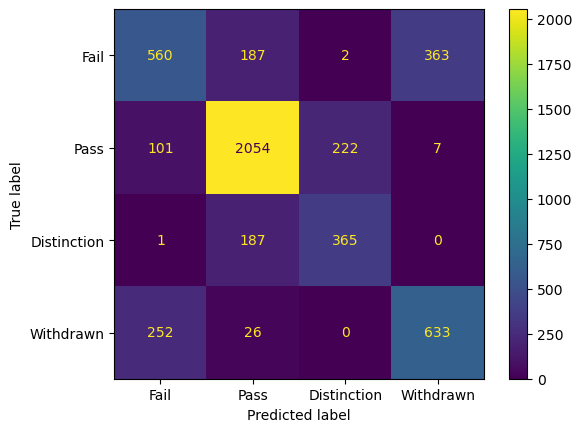

In [184]:
cm = confusion_matrix(y_test, predy2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= ['Fail', 'Pass','Distinction',"Withdrawn"])
disp.plot()

plt.show()

In [185]:
eclf1.fit(X_res,y_res)
predy2 = eclf1.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.3658    0.4119    0.3875      1112
        Pass     0.8304    0.5608    0.6695      2384
 Distinction     0.4181    0.6781    0.5172       553
   Withdrawn     0.5737    0.7563    0.6525       911

    accuracy                         0.5764      4960
   macro avg     0.5470    0.6018    0.5567      4960
weighted avg     0.6331    0.5764    0.5862      4960



In [186]:
rf.fit(X_res,y_res)

RandomForestClassifier(random_state=0)

In [187]:
rf.score(X_test,y_test)

0.728225806451613

In [188]:
eclf2.fit(X_res,y_res)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('grf', RandomForestClassifier(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=0))])

In [189]:
eclf2.score(X_test,y_test)

0.6887096774193548

In [190]:
ros = RandomOverSampler(random_state=21)

In [191]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [192]:
rf.fit(X_ros,y_ros)

RandomForestClassifier(random_state=0)

In [193]:
rf.score(X_test,y_test)

0.726008064516129

<Axes: >

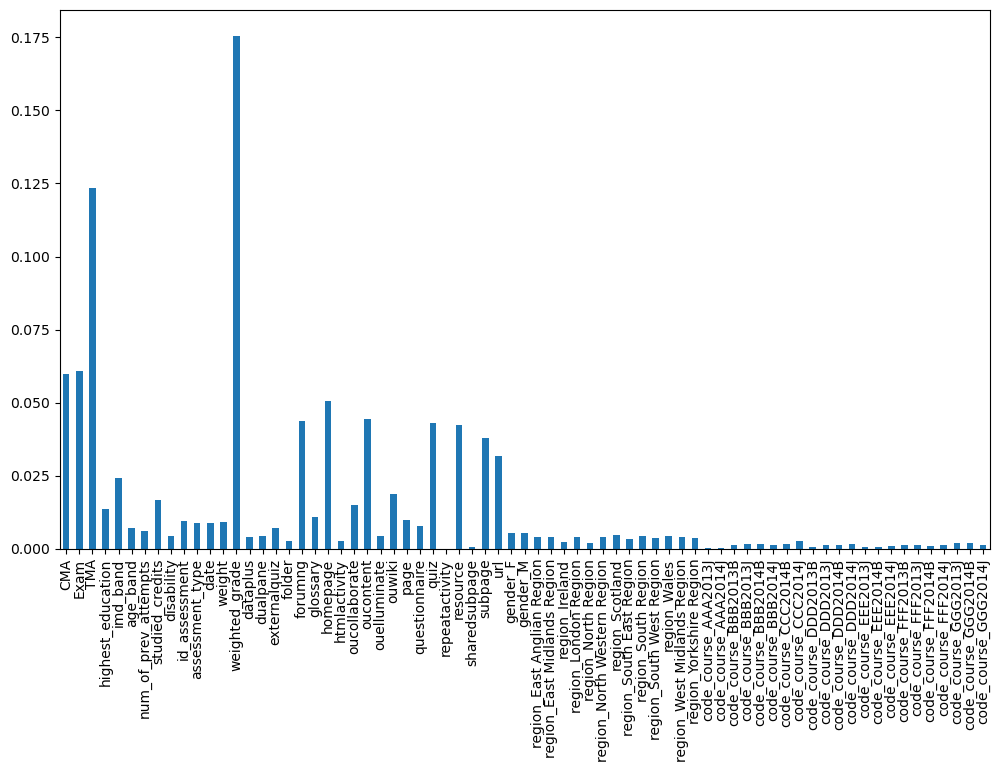

In [194]:
fig, ax = plt.subplots(figsize=(12, 7))

feat_importances = pd.Series(rf.feature_importances_, index=X_ros.columns)
feat_importances.plot(kind='bar')

In [195]:
eclf2.fit(X_ros,y_ros)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('grf', RandomForestClassifier(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=0))])

In [196]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [197]:
rosepred = rf.predict(X_test)

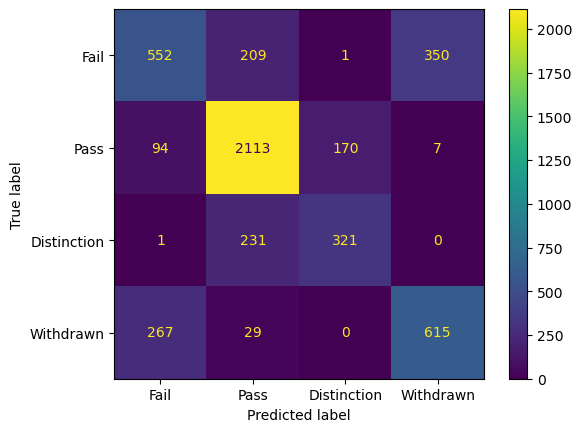

In [198]:
cm = confusion_matrix(y_test, rosepred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['Fail', 'Pass','Distinction',"Withdrawn"])
disp.plot()

plt.show()

In [199]:
target_names = ['Fail', 'Pass', 'Distinction','Withdrawn']
print(classification_report(y_test,rosepred,target_names = target_names))

              precision    recall  f1-score   support

        Fail       0.60      0.50      0.54      1112
        Pass       0.82      0.89      0.85      2384
 Distinction       0.65      0.58      0.61       553
   Withdrawn       0.63      0.68      0.65       911

    accuracy                           0.73      4960
   macro avg       0.68      0.66      0.67      4960
weighted avg       0.72      0.73      0.72      4960



In [200]:
df_ds3_drpqm_mod2 = df_ds3_drpqm_mod.copy()

In [201]:
df_ds3_drpqm_mod2["final_result"] = df_ds3_drpqm_mod2["final_result"].replace({3:0,2:1})

<Axes: ylabel='count'>

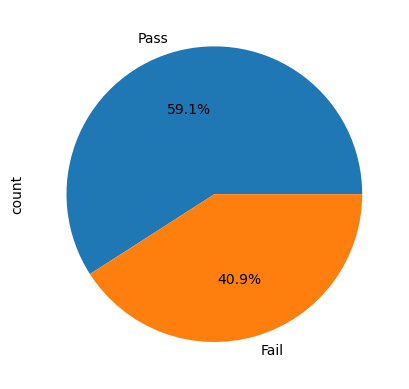

In [202]:
df_ds3_drpqm_mod2["final_result"].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%', labels = ["Pass","Fail"])

In [203]:
df_ds3_drpqm_mod2["final_result"].value_counts(normalize=True)

final_result
1    0.590821
0    0.409179
Name: proportion, dtype: float64

In [204]:
X_2 = df_ds3_drpqm_mod2.drop("final_result",axis=1)
y_2 = df_ds3_drpqm_mod2["final_result"]

In [205]:
X_2train, X_2test, y_2train, y_2test = model_selection.train_test_split( X_2, y_2, test_size=0.2, random_state=21)

In [206]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_2train,y_2train)
    knn_scores.append(knn.score(X_2test,y_2test))
    
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

Optimal KNN value is  16 0.9002016129032258


In [207]:
knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X_2train,y_2train)
predy = knn.predict(X_2test)
target_names = ['Fail', 'Pass']
print(classification_report(y_2test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.9207    0.8265    0.8711      2023
        Pass     0.8884    0.9510    0.9186      2937

    accuracy                         0.9002      4960
   macro avg     0.9045    0.8887    0.8948      4960
weighted avg     0.9016    0.9002    0.8992      4960



In [208]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_2train,y_2train)
    dec_tree_score.append(knn.score(X_2test,y_2test))
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

Optimal DT value is  1 0.9002016129032258


In [209]:
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)

dec_treel.fit(X_2train,y_2train)
predy = dec_treel.predict(X_2test)

print(classification_report(y_2test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.9371    0.7954    0.8604      2023
        Pass     0.8723    0.9632    0.9155      2937

    accuracy                         0.8948      4960
   macro avg     0.9047    0.8793    0.8880      4960
weighted avg     0.8988    0.8948    0.8931      4960



In [210]:
nb.fit(X_2train,y_2train)
predy2 = nb.predict(X_2test)

print(classification_report(y_2test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.6247    0.8408    0.7168      2023
        Pass     0.8561    0.6520    0.7402      2937

    accuracy                         0.7290      4960
   macro avg     0.7404    0.7464    0.7285      4960
weighted avg     0.7617    0.7290    0.7307      4960



In [211]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=16)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 1)
eclf12cat = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3)], voting='hard')

In [212]:
eclf12cat.fit(X_2train,y_2train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=16)),
                             ('gnb', MultinomialNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=1,
                                                     random_state=0))])

In [213]:
eclf12cat.score(X_2test,y_2test)

0.9024193548387097

In [214]:
eclf12cat_pred =eclf12cat.predict(X_2test)

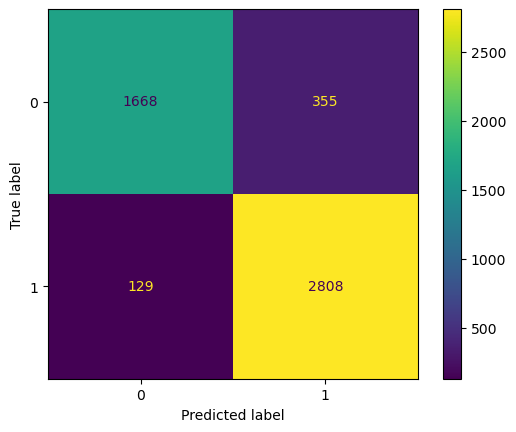

In [215]:
cm = confusion_matrix(y_2test, eclf12cat_pred, labels=eclf12cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=eclf12cat.classes_)
disp.plot()

plt.show()

In [216]:
target_names = ['Fail', 'Pass']
print(classification_report(y_2test,eclf12cat_pred,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.9282    0.8245    0.8733      2023
        Pass     0.8878    0.9561    0.9207      2937

    accuracy                         0.9024      4960
   macro avg     0.9080    0.8903    0.8970      4960
weighted avg     0.9043    0.9024    0.9013      4960



In [217]:
rf.fit(X_2train,y_2train)

RandomForestClassifier(random_state=0)

In [218]:
rf.score(X_2test,y_2test)

0.9356854838709677

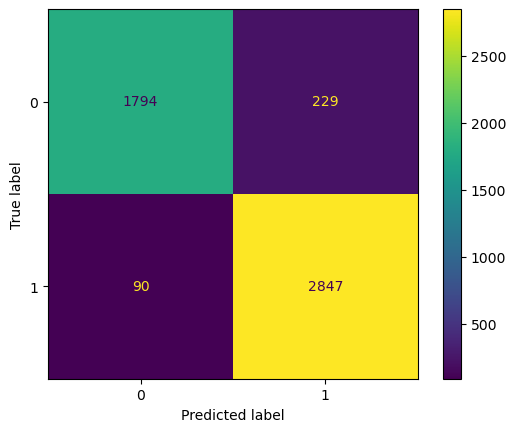

In [219]:
rf2cat_pred = rf.predict(X_2test)
cm = confusion_matrix(y_2test, rf2cat_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [220]:
target_names = ['Fail', 'Pass']
print(classification_report(y_2test,rf2cat_pred,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.9522    0.8868    0.9184      2023
        Pass     0.9256    0.9694    0.9469      2937

    accuracy                         0.9357      4960
   macro avg     0.9389    0.9281    0.9326      4960
weighted avg     0.9364    0.9357    0.9353      4960



In [221]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest

In [222]:
score = 0
best = 0
cols2c = "a"
preds = "a"
for i in range(1,len(X_2.columns)):
    skb = SelectKBest(k=i)
    skb.fit(X_2, y_2)
    skb.transform(X_2)
    cols_skb = skb.get_feature_names_out()
    X_2catskb = pd.DataFrame(X_2, columns = cols_skb)
    X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y_2, test_size=0.2, random_state=21)
    rf.fit(X2c_train,y2c_train)
    tmpscr = rf.score(X2c_test,y2c_test)
    tmppred = rf.predict(X2c_test)
    if tmpscr > score:
        score = tmpscr
        best = i
        cols2c = cols_skb
        preds = tmppred

In [223]:
print("Best k fatures:",best," with a score: ",score,"% \n",cols2c)

Best k fatures: 41  with a score:  0.9358870967741936 % 
 ['CMA' 'Exam' 'TMA' 'highest_education' 'imd_band' 'age_band'
 'num_of_prev_attempts' 'studied_credits' 'disability' 'id_assessment'
 'assessment_type' 'date' 'weight' 'weighted_grade' 'dataplus' 'dualpane'
 'externalquiz' 'folder' 'forumng' 'glossary' 'homepage' 'htmlactivity'
 'oucollaborate' 'oucontent' 'ouelluminate' 'ouwiki' 'page'
 'questionnaire' 'quiz' 'resource' 'subpage' 'url' 'gender_M'
 'code_course_AAA2013J' 'code_course_CCC2014B' 'code_course_CCC2014J'
 'code_course_DDD2013B' 'code_course_EEE2013J' 'code_course_EEE2014J'
 'code_course_GGG2013J' 'code_course_GGG2014J']


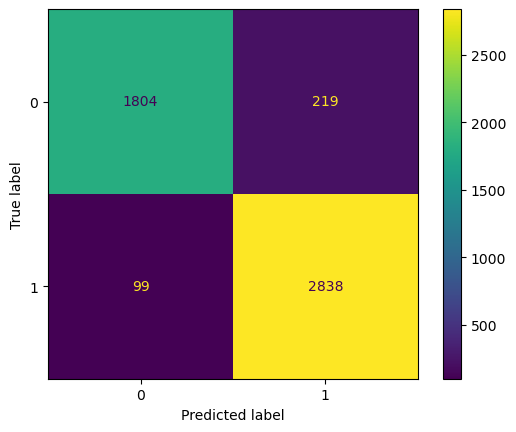

In [224]:

cm = confusion_matrix(y_2test, preds, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [225]:
target_names = ['Fail', 'Pass']
print(classification_report(y_2test,preds,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.9480    0.8917    0.9190      2023
        Pass     0.9284    0.9663    0.9469      2937

    accuracy                         0.9359      4960
   macro avg     0.9382    0.9290    0.9330      4960
weighted avg     0.9364    0.9359    0.9355      4960

